# Clone Github

In [1]:
!git clone https://github.com/usmaaangul/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo.git

Cloning into 'Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 175 (delta 19), reused 112 (delta 0), pack-reused 0
Receiving objects: 100% (175/175), 28.71 MiB | 32.67 MiB/s, done.
Resolving deltas: 100% (19/19), done.


# Importing Using Libraries

















In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# Matrix
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from keras.metrics import Recall, Precision


from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

from keras.models import Model


from keras.callbacks import ReduceLROnPlateau

# specifically for cnn


from keras.layers import BatchNormalization, MaxPool2D, Conv2DTranspose, Concatenate, Input

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D ,GlobalAveragePooling2D
 
import tensorflow as tf
import random as rn
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils.np_utils import to_categorical

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2    
import imageio              
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from keras import backend as K
import gc

# Loading Images

In [3]:
IMG_SIZE=512
epoch_size=50
batch_size=64
X1=list()
Z1=list()



def make_train_data(DIR_img,DIR_msk):

  for img in tqdm(os.listdir(DIR_img)):
    path = os.path.join(DIR_img,img)
    
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    #plt.imshow(img)
    X1.append(np.array(img))

  for msk in tqdm(os.listdir(DIR_msk)):
    path = os.path.join(DIR_msk,msk)
    img = imageio.mimread(path)[0]
    
    #img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    
    #plt.imshow(img)
    #plt.show()
    img=np.expand_dims(img, axis=-1)
    
    Z1.append(np.array(img))

### Load Dataset-I

In [4]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/training/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/training/1st_manual'

make_train_data(image_dir,mask_dir)

100%|██████████| 20/20 [00:00<00:00, 199.64it/s]


In [5]:
from albumentations import HorizontalFlip, VerticalFlip, ElasticTransform, GridDistortion, OpticalDistortion

def augment_data(images, masks):
  H = IMG_SIZE
  W = IMG_SIZE
  X=list()
  Y=list()

  for x, y in zip(images, masks):
    #_____________________________#
    aug = HorizontalFlip(p=1.0)
    augmented = aug(image=x, mask=y)
    x1 = augmented["image"]
    y1 = augmented["mask"]

    #x1 = cv2.resize(x1, (IMG_SIZE,IMG_SIZE))
    X.append(x1)

    #y1 = cv2.resize(y1, (IMG_SIZE,IMG_SIZE))
    #y1=np.array(y1)
    #y1=np.expand_dims(y1, axis=-1)
    Y.append(y1)



    #_____________________________#
    aug = VerticalFlip(p=1.0)
    augmented = aug(image=x, mask=y)
    x2 = augmented["image"]
    y2 = augmented["mask"]

    #x2 = cv2.resize(x2, (IMG_SIZE,IMG_SIZE))
    X.append(x2)

    #y2 = cv2.resize(y2, (IMG_SIZE,IMG_SIZE))
    #y2=np.array(y2)
    #y2=np.expand_dims(y2, axis=-1)
    Y.append(y2)



    #_____________________________#
    aug = ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
    augmented = aug(image=x, mask=y)
    x3 = augmented['image']
    y3 = augmented['mask']

    #x3 = cv2.resize(x3, (IMG_SIZE,IMG_SIZE))
    X.append(x3)

    #y3 = cv2.resize(y3, (IMG_SIZE,IMG_SIZE))
    #y3=np.array(y3)
    #y3=np.expand_dims(y3, axis=-1)
    Y.append(y3)


    #_____________________________#
    aug = GridDistortion(p=1)
    augmented = aug(image=x, mask=y)
    x4 = augmented['image']
    y4 = augmented['mask']

    #x4 = cv2.resize(x4, (IMG_SIZE,IMG_SIZE))
    X.append(x4)

    #y4 = cv2.resize(y4, (IMG_SIZE,IMG_SIZE))
    #y4=np.array(y4)
    #y4=np.expand_dims(y4, axis=-1)
    Y.append(y4)


    #_____________________________#
    aug = OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
    augmented = aug(image=x, mask=y)
    x5 = augmented['image']
    y5 = augmented['mask']

    #x5 = cv2.resize(x5, (IMG_SIZE,IMG_SIZE))
    X.append(x5)

    #y5 = cv2.resize(y5, (IMG_SIZE,IMG_SIZE))
    #y5=np.array(y5)
    #y5=np.expand_dims(y5, axis=-1)
    Y.append(y5)




    #_____________________________#
    #x = cv2.resize(x, (IMG_SIZE,IMG_SIZE))
    X.append(x)

    #y = cv2.resize(y, (IMG_SIZE,IMG_SIZE))
    #y=np.array(y)
    #y=np.expand_dims(y, axis=-1)
    Y.append(y)

            

  return X,Y

In [6]:
X,Y=augment_data(X1,Z1)

In [7]:
X=np.array(X)
X=X/255

Y=np.array(Y)
Y=Y/255

In [8]:
Y.shape

(120, 512, 512, 1)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, test_size=0.5)

In [10]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

### Model uning Functionl API's from keras

In [11]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs=inputs, outputs=outputs, name="UNET")
    return model

In [12]:
input_shape = (IMG_SIZE, IMG_SIZE, 3)
model = build_unet(input_shape)
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

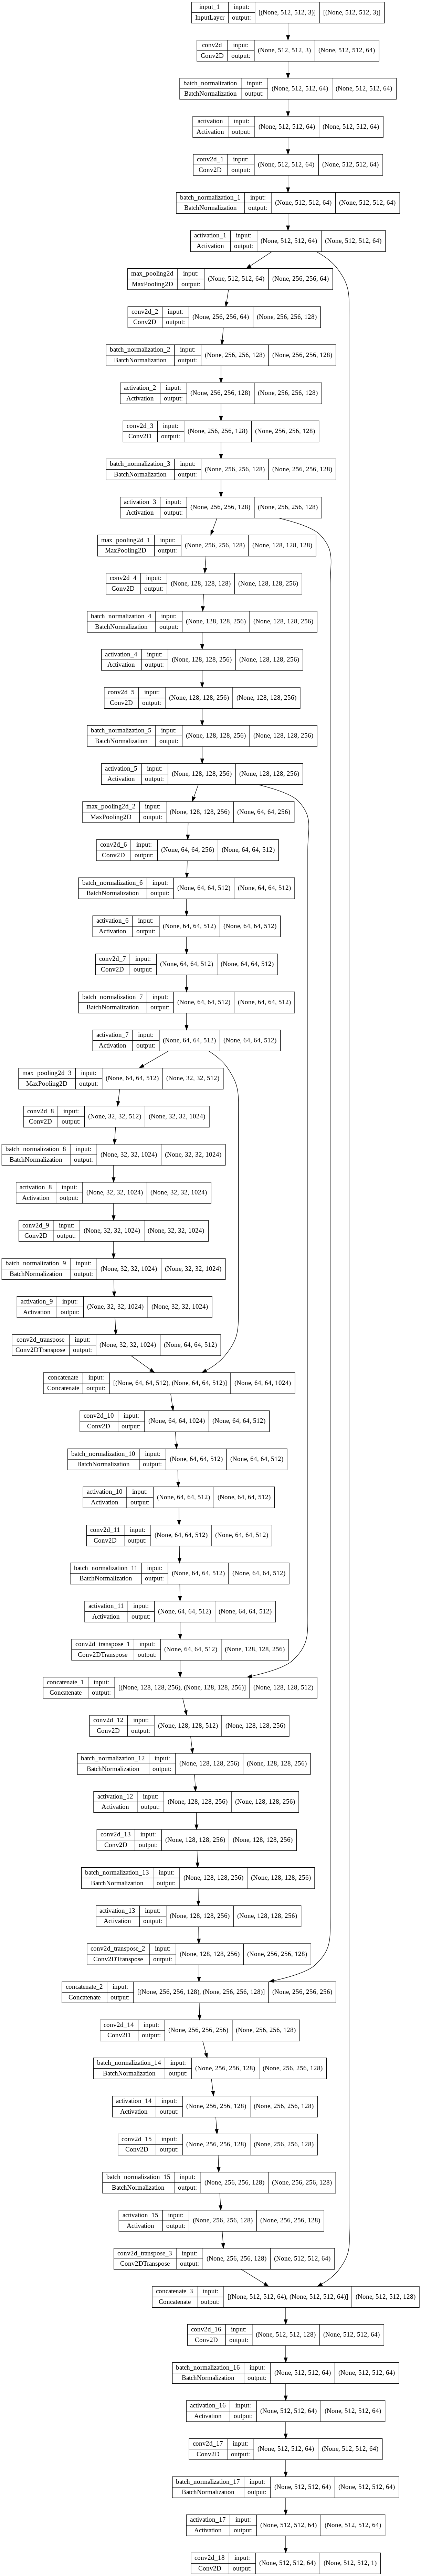

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [15]:
x_train[0].shape

(512, 512, 3)

In [16]:
y_train[0].shape

(512, 512, 1)

In [17]:
'''train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))'''

'train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))\nval_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))'

In [ ]:
History1 = model.fit(x_train,y_train,batch_size=batch_size,epochs = epoch_size, validation_data = (x_valid,y_valid),verbose = 1)


history_df = pd.DataFrame(History1.history)

## More Process

In [ ]:
#model.save('/content/drive/MyDrive/Datasets/Bigger Datasets-FL/Class_Imbalance_8Datasets_3Classes/model1_round0.h5')

In [ ]:
# plot the loss
plt.plot(History1.history['loss'], label='train loss')
plt.plot(History1.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(History1.history['accuracy'], label='train acc')
plt.plot(History1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
y_pred = y_pred.astype(np.int32)
y_pred = np.squeeze(y_pred, axis=-1)

In [ ]:
y_pred = np.expand_dims(y_pred, axis=-1)
y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1) * 255

In [ ]:
y_pred[0].shape

IndexError: ignored

In [ ]:
plt.imshow(y_pred[0])

IndexError: ignored

In [ ]:
check=y_test

In [ ]:
check = np.concatenate([check, check, check], axis=-1) * 255
check.shape

(12, 512, 512, 3)

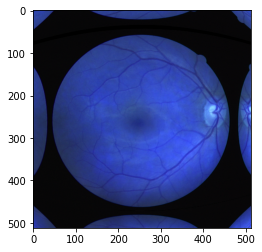

In [ ]:
plt.imshow(x_test[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


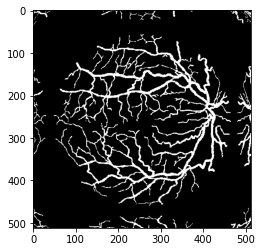

In [ ]:
plt.imshow(check[2])